In [4]:
import cv2
import numpy as np
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

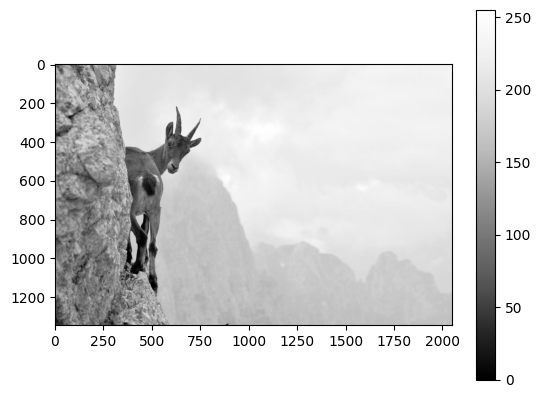

In [22]:
#fn = "uploads/doge2.png"
fn = "uploads/ibex.jpg"

img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="Greys_r")
plt.colorbar()

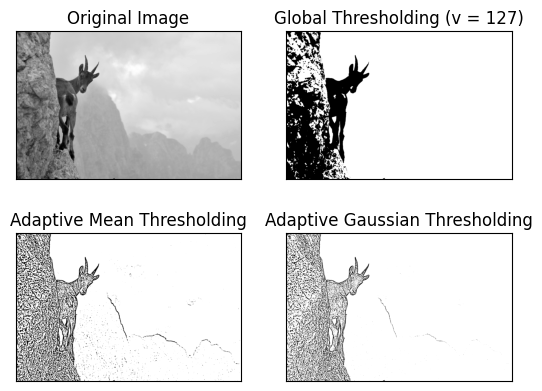

In [23]:
img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

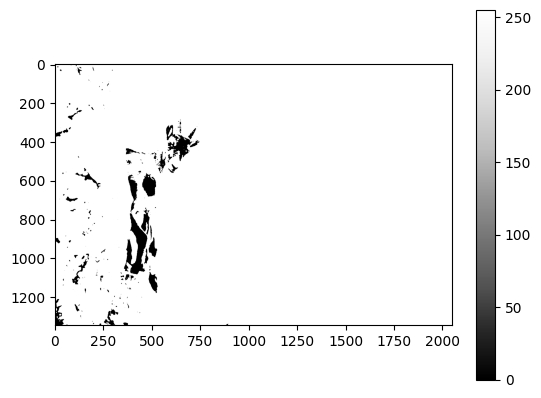

In [24]:
raster_thresh = 60
ret,thresh1 = cv2.threshold(img,raster_thresh,255,cv2.THRESH_BINARY)

plt.imshow(thresh1, cmap="Greys_r")
plt.colorbar()

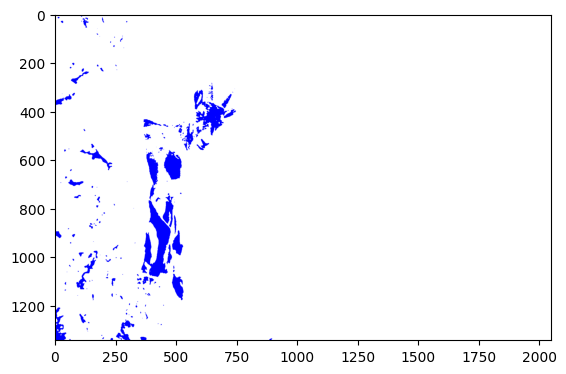

In [25]:
img = cv2.cvtColor(thresh1,cv2.COLOR_GRAY2RGB)
img = ~img
img[np.where((img==[255,255,255]).all(axis=2))] = [0,0,255]
img[np.where((img==[0,0,0]).all(axis=2))] = [255,255,255]
plt.imshow(img)

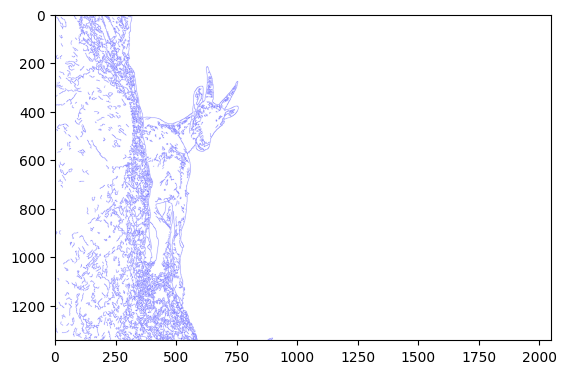

In [26]:
img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
img_blur = cv2.GaussianBlur(img,(3,3), sigmaX=0, sigmaY=0) 

# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=50, threshold2=100) 

img = cv2.cvtColor(edges,cv2.COLOR_GRAY2RGB)
img[np.where((img==[255,255,255]).all(axis=2))] = [0,0,255]
#img[np.where((img==[255,255,255]).all(axis=2))] = [0,0,0]
img[np.where((img==[0,0,0]).all(axis=2))] = [255,255,255]

plt.imshow(img)